In [6]:
import tensorflow as tf 
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical


In [7]:
train_dir=r"F:\it18021\archive\train/"
labelEm={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
classes=['0','1','2','3','4','5','6']

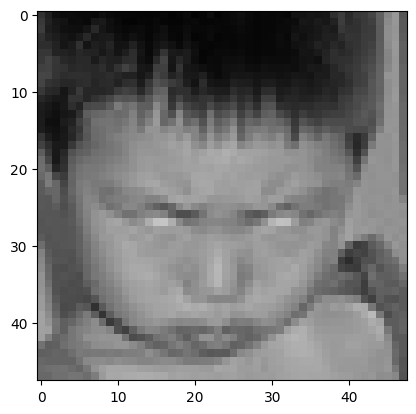

In [3]:
for category in classes:
    
    path= os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
        plt.show()
        
        break
    break

In [8]:
img_arr.shape

(48, 48, 3)

In [8]:
img=cv2.imread(r'F:\it18021\archive\test\0\PrivateTest_10131363.jpg')
print(img)

[[[ 46  46  46]
  [ 34  34  34]
  [ 26  26  26]
  ...
  [ 10  10  10]
  [ 13  13  13]
  [ 22  22  22]]

 [[ 50  50  50]
  [ 28  28  28]
  [ 21  21  21]
  ...
  [ 11  11  11]
  [ 10  10  10]
  [ 21  21  21]]

 [[ 50  50  50]
  [ 27  27  27]
  [ 15  15  15]
  ...
  [ 22  22  22]
  [ 24  24  24]
  [ 22  22  22]]

 ...

 [[208 208 208]
  [179 179 179]
  [108 108 108]
  ...
  [191 191 191]
  [205 205 205]
  [204 204 204]]

 [[212 212 212]
  [198 198 198]
  [149 149 149]
  ...
  [181 181 181]
  [200 200 200]
  [204 204 204]]

 [[208 208 208]
  [201 201 201]
  [171 171 171]
  ...
  [165 165 165]
  [180 180 180]
  [189 189 189]]]


In [9]:
img_size=224
train_dir=r'F:\it18021\archive\train'
train_data=[]
for category in classes :
    path = os.path.join(train_dir,category)
    class_num = classes.index(category)
    for img in os.listdir(path):
        try: 
            img_array= cv2.imread(os.path.join(path,img))
            new_array= cv2.resize(img_array,(img_size,img_size))
            train_data.append([new_array,class_num])
        except Exception as e:
            pass


In [10]:
len(train_data)

28709

In [11]:
import random 
random.shuffle(train_data)

In [12]:
img_size=224 
X=[] #feature 
y=[] #label emotion 
for features,label in train_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [13]:
X.shape

(28709, 224, 224, 3)

In [14]:
X[0].shape

(224, 224, 3)

In [15]:
X=X/255.0 #rescaling 

In [16]:
y=np.array(y)

In [19]:
#testing data generate 
test_dir=r"F:\it18021\archive\test/"
labelEm={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
classes=['0','1','2','3','4','5','6']

In [20]:
test_data=[]
def create_testData():
    for category in classes :
        path = os.path.join(test_dir,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try: 
                img_array= cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
            

In [21]:
create_testData()

In [22]:
print(len(test_data))

7178


In [24]:
import random 
random.shuffle(test_data)
X_test=[] #feature 
y_test=[] #label emotion 
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test=np.array(X_test).reshape(-1,img_size,img_size,3)

In [25]:
X_test.shape

(7178, 224, 224, 3)

In [26]:
X_test=X_test/255.0 #rescaling 

In [27]:
y_test=np.array(y_test)

In [52]:
print(len(X),len(y))
print(len(X_test),len(y_test))

28709 28709
5000 5000


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, shuffle=False)

In [20]:
#defining the model 
#transfer learning 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
#defing the model 
model= tf.keras.applications.MobileNetV2() 

In [22]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [23]:
model.trainable=False # freezing the layer 

In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [25]:
base_input= model.layers[0].input

In [26]:
base_output=model.layers[-2].output

In [27]:
base_input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [28]:
base_output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [29]:
final_output= layers.Dense(512)(base_output)
final_output= layers.Activation('relu')(final_output)
final_output= layers.Dense(128)(final_output)
final_output= layers.Activation('relu')(final_output)
final_output= layers.Dense(64)(final_output)
final_output= layers.Activation('relu')(final_output)
final_output= layers.Dense(7,activation='softmax')(final_output)

In [30]:
final_output

<tf.Tensor 'dense_3/Softmax:0' shape=(None, 7) dtype=float32>

In [31]:
new_model= keras.Model(inputs= base_input,outputs=final_output)

In [32]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [33]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
new_model.fit(X_train,y_train,epochs=15)

Epoch 1/15
673/673 [==============================] - 251s 373ms/step - loss: 1.5118 - accuracy: 0.4171
Epoch 2/15
673/673 [==============================] - 248s 369ms/step - loss: 1.3539 - accuracy: 0.4814
Epoch 3/15
673/673 [==============================] - 244s 362ms/step - loss: 1.2786 - accuracy: 0.5107
Epoch 4/15
673/673 [==============================] - 247s 366ms/step - loss: 1.2228 - accuracy: 0.5382
Epoch 5/15
673/673 [==============================] - 256s 381ms/step - loss: 1.1668 - accuracy: 0.5638
Epoch 6/15
673/673 [==============================] - 247s 367ms/step - loss: 1.1110 - accuracy: 0.5845
Epoch 7/15
673/673 [==============================] - 251s 374ms/step - loss: 1.0488 - accuracy: 0.6091
Epoch 8/15
673/673 [==============================] - 243s 361ms/step - loss: 0.9908 - accuracy: 0.6350
Epoch 9/15
673/673 [==============================] - 247s 367ms/step - loss: 0.9268 - accuracy: 0.6557
Epoch 10/15
673/673 [==============================] - 250s 372m

In [35]:
new_model.evaluate(X_test,y_test)

225/225 [==============================] - 84s 374ms/step - loss: 1.7920 - accuracy: 0.5078


[1.7920043468475342, 0.5078015923500061]

In [42]:
X_test=X[:5000]
y_test=y[:5000]

In [43]:
#changing the epoch 
new_model.fit(X_test,y_test,epochs=10)


Epoch 1/10
157/157 [==============================] - 30s 193ms/step - loss: 0.5109 - accuracy: 0.8118
Epoch 2/10
157/157 [==============================] - 30s 192ms/step - loss: 0.3689 - accuracy: 0.8696
Epoch 3/10
157/157 [==============================] - 30s 193ms/step - loss: 0.2781 - accuracy: 0.9028
Epoch 4/10
157/157 [==============================] - 30s 191ms/step - loss: 0.2388 - accuracy: 0.9160
Epoch 5/10
157/157 [==============================] - 30s 193ms/step - loss: 0.1611 - accuracy: 0.9514
Epoch 6/10
157/157 [==============================] - 30s 192ms/step - loss: 0.1463 - accuracy: 0.9522
Epoch 7/10
157/157 [==============================] - 30s 192ms/step - loss: 0.1371 - accuracy: 0.9530
Epoch 8/10
157/157 [==============================] - 30s 191ms/step - loss: 0.0963 - accuracy: 0.9708
Epoch 9/10
157/157 [==============================] - 30s 191ms/step - loss: 0.1252 - accuracy: 0.9584
Epoch 10/10
157/157 [==============================] - 30s 193ms/step - l

In [44]:
new_model.evaluate(X_test,y_test)

157/157 [==============================] - 30s 190ms/step - loss: 0.1610 - accuracy: 0.9444


[0.1609901785850525, 0.9444000124931335]

In [45]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

In [46]:
preds

array([[3.21115454e-04, 2.62605073e-03, 6.12062358e-05, ...,
        3.89900342e-05, 1.60491749e-04, 4.35721682e-04],
       [8.98442158e-05, 2.52417696e-04, 2.63997954e-05, ...,
        8.14953091e-06, 3.92038673e-05, 4.55449248e-04],
       [5.27614538e-05, 1.86896450e-05, 2.13545893e-04, ...,
        2.62143149e-05, 1.37626572e-04, 3.65476990e-05],
       ...,
       [2.35780681e-04, 3.18185124e-03, 3.14299599e-04, ...,
        5.73641701e-05, 4.19941847e-04, 4.62354568e-04],
       [2.57418928e-04, 9.69678396e-04, 1.09717490e-04, ...,
        5.38885433e-05, 3.49673966e-04, 1.44685793e-03],
       [1.02294489e-05, 1.92616877e-04, 1.75806508e-06, ...,
        3.40243423e-06, 1.75677542e-05, 1.11953486e-04]], dtype=float32)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

ModuleNotFoundError: No module named 'sklearn'